In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wolff as wf

### First let's create a lattice with parameters specified below and carry out Wolff algorithm for itnum times 

In [2]:
#create a lattice with these parameters
Lx = 40
Ly = 40
J = 1
Beta = 0.45

initial_lattice, neighs = wf.create_lattice(Lx = Lx, Ly = Ly)

In [3]:
#carry out Wolff algorithm for 1500 iterations
itnum = 1500
Es, latcont = wf.wolff_algorithm(lattice = initial_lattice.copy(), neighs = neighs, Beta = Beta, J = J,
                             Lx = Lx, Ly = Ly, itnum = itnum)

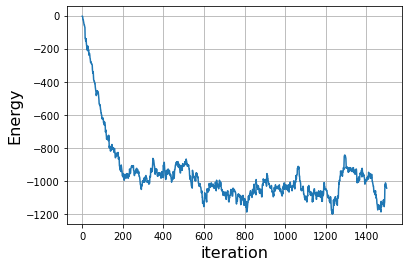

In [4]:
#plot the energy as a function of iterations
fig = plt.figure(figsize = (6,4))
plt.plot(Es)
plt.xlabel(r"iteration", fontsize = 16)
plt.ylabel(r"Energy", fontsize = 16)
plt.grid(True)
plt.show()

Text(0, 0.5, 'y')

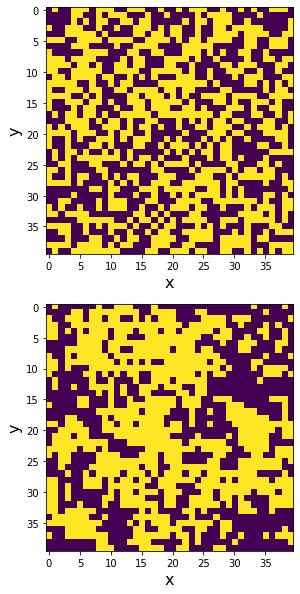

In [5]:
#show the initial lattice and the final lattice
fig,[ax0,ax1] = plt.subplots(2, figsize = (6,10))
ax0.imshow(latcont[0])
ax0.set_xlabel("x", fontsize = 16)
ax0.set_ylabel("y", fontsize = 16)

ax1.imshow(latcont[-1])
ax1.set_xlabel("x", fontsize = 16)
ax1.set_ylabel("y", fontsize = 16)

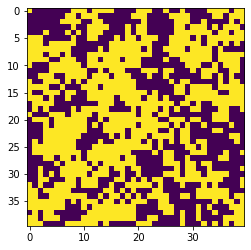

In [6]:
#make a short animation about the time evolution
wf.anim(latcont)

#### Investigate the energy fluctuations as a function of inverse temperature.

Here this is doing an ensemble average over the energy fluctuations.

In [10]:
Betas = np.linspace(0.4,0.48,30)
Ef = wf.ensemble_av(Betas = Betas, J = J, Lx = Lx, Ly = Ly, itnum = 10000, ens_num = 100)

In [11]:
np.savetxt(X = Ef, fname = "ensemble_average")

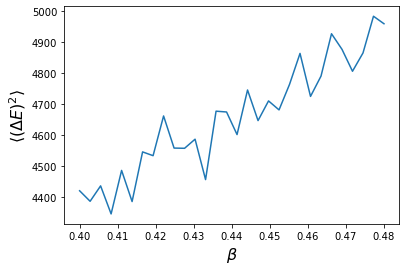

In [12]:
fig = plt.figure(figsize = (6,4)) 
plt.plot(Betas, Ef)
plt.xlabel(r"$\beta$", fontsize = 16)
plt.ylabel(r"$\left< \left( \Delta E \right)^2 \right>$", fontsize = 16)
plt.show()